In [ ]:
# !unzip /content/drive/MyDrive/busanit501_240814/practice/tools2_100.zip -d /content/drive/MyDrive/busanit501_240814/practice/

Archive:  /content/drive/MyDrive/busanit501_240814/practice/tools2_100.zip
   creating: /content/drive/MyDrive/busanit501_240814/practice/test/
   creating: /content/drive/MyDrive/busanit501_240814/practice/test/hammer/
  inflating: /content/drive/MyDrive/busanit501_240814/practice/test/hammer/망치.1.jpg  
  inflating: /content/drive/MyDrive/busanit501_240814/practice/test/hammer/망치.10.jpg  
  inflating: /content/drive/MyDrive/busanit501_240814/practice/test/hammer/망치.12.jpg  
  inflating: /content/drive/MyDrive/busanit501_240814/practice/test/hammer/망치.13.jpg  
  inflating: /content/drive/MyDrive/busanit501_240814/practice/test/hammer/망치.14.jpg  
  inflating: /content/drive/MyDrive/busanit501_240814/practice/test/hammer/망치.15.jpg  
  inflating: /content/drive/MyDrive/busanit501_240814/practice/test/hammer/망치.16.jpg  
  inflating: /content/drive/MyDrive/busanit501_240814/practice/test/hammer/망치.18.jpg  
  inflating: /content/drive/MyDrive/busanit501_240814/practice/test/hammer/망치.2.jpg  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt

# 경로 설정
dataset_path = "/content/drive/MyDrive/busanit501_240814/practice"
model_weight_save_path = "/content/drive/MyDrive/busanit501_240814/practice/"
num_classes = 2

# 데이터 변환 정의
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 학습 데이터셋 로드
train_dataset = torchvision.datasets.ImageFolder(root=os.path.join(dataset_path, 'train'), transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

# 테스트 데이터셋 로드
test_dataset = torchvision.datasets.ImageFolder(root=os.path.join(dataset_path, 'test'), transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


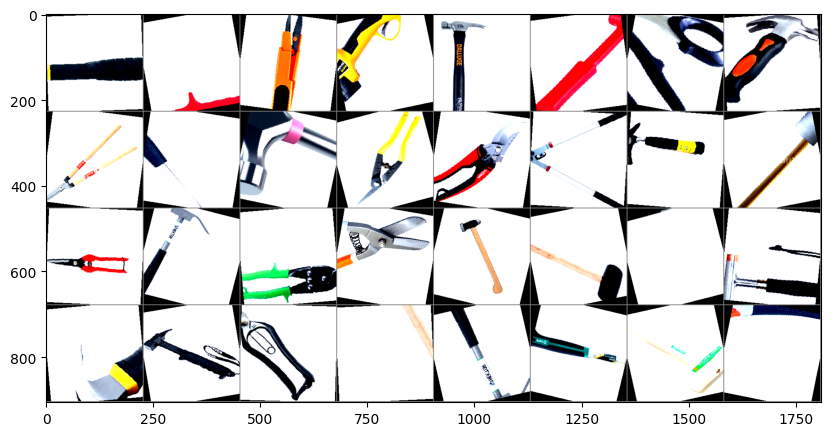

torch.Size([32, 3, 224, 224])


In [ ]:
def imshow(img):
    img = .5*img + .5
    plt.figure(figsize=(10,100))
    plt.imshow(img.permute(1,2,0).numpy())
    plt.show()

images, labels = next(iter(train_loader))
imshow(torchvision.utils.make_grid(images,nrow=8))
print(images.size()) # 배치 및 이미지 크기 확인

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# ResNet-50 모델 로드
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)  # 클래스 수에 맞게 출력 레이어 조정

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 모델 학습
for epoch in range(10):  # 10 에포크 동안 학습
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')

    # 모델 중간 저장
    torch.save(model.state_dict(), os.path.join(model_weight_save_path, f'resnet50_epoch_{epoch+1}.pth'))

print('Finished Training')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 199MB/s]


Epoch 1, Loss: 0.7118257454463414
Epoch 2, Loss: 0.6374257292066302
Epoch 3, Loss: 0.5351889516626086
Epoch 4, Loss: 0.47270889367376057
Epoch 5, Loss: 0.36420589472566334
Epoch 6, Loss: 0.2856328231947763
Epoch 7, Loss: 0.29205322265625
Epoch 8, Loss: 0.18898989260196686
Epoch 9, Loss: 0.24674773854868753
Epoch 10, Loss: 0.1724173884306635
Finished Training


In [ ]:
# 모델 평가
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Accuracy: 91.66666666666667%
